In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')
import os
%matplotlib inline
!pip install missingno
import missingno as msno
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
!pip install optuna
import optuna
import xgboost as xgb
from xgboost import XGBClassifier
!pip install catboost
import catboost
from catboost import CatBoostClassifier
!pip install lightgbm
import lightgbm as lgbm
from lightgbm import LGBMClassifier
optuna.logging.set_verbosity(optuna.logging.WARNING)
from lightgbm import *
pd.set_option("display.max_columns", None)

In [13]:
data = pd.read_csv('merged_data.csv')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11509051 entries, 0 to 11509050
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   EDA       float64
 4   HR        float64
 5   TEMP      float64
 6   id        object 
 7   datetime  object 
 8   label     float64
dtypes: float64(7), object(2)
memory usage: 790.3+ MB


In [17]:
data.describe()

,X,Y,Z,EDA,HR,TEMP,label
count,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07
mean,-2.823775e+01,-9.091032e-01,2.382449e+01,3.502127e+00,8.576090e+01,3.223435e+01,1.554202e+00
std,3.142310e+01,3.343382e+01,2.985317e+01,5.656541e+00,1.419642e+01,2.260516e+00,7.891827e-01
min,-1.280000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00,5.100000e+01,2.409000e+01,0.000000e+00
25%,-5.200000e+01,-1.900000e+01,4.000000e+00,2.242060e-01,7.672000e+01,3.019000e+01,1.000000e+00
50%,-3.300000e+01,1.000000e+00,2.500000e+01,1.157407e+00,8.390000e+01,3.257000e+01,2.000000e+00
75%,-1.400000e+01,1.700000e+01,4.900000e+01,4.077436e+00,9.310000e+01,3.425000e+01,2.000000e+00
max,1.270000e+02,1.270000e+02,1.270000e+02,5.976071e+01,1.802300e+02,3.659000e+01,2.000000e+00


In [18]:
data.head(-10)

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0
...,...,...,...,...,...,...,...,...,...
11509036,-30.0,-36.0,30.0,3.398877,88.37,33.77,F5,2020-07-23 17:28:59.562500096,2.0
11509037,-28.0,-36.0,26.0,3.398877,88.37,33.77,F5,2020-07-23 17:28:59.593750016,2.0
11509038,-39.0,-32.0,19.0,3.398877,88.37,33.77,F5,2020-07-23 17:28:59.624999936,2.0
11509039,-26.0,-26.0,28.0,3.398877,88.37,33.77,F5,2020-07-23 17:28:59.656250112,2.0


In [19]:
data.dtypes

X           float64
Y           float64
Z           float64
EDA         float64
HR          float64
TEMP        float64
id           object
datetime     object
label       float64
dtype: object

In [20]:
data.isnull().sum()

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64

# **Exploratory Data Analysis**

In [ ]:
#Plot missing data using heatmap
plt.figure(figsize=(4, 2))
plt.title("Training Set")
sns.heatmap(data.isnull(), cbar=False, cmap="coolwarm")
plt.show()

In [ ]:
data= data.drop(columns=['id'],axis=1)
data

In [ ]:
#feature extraction from a datetime column
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
# The errors='coerce' argument will handle errors by setting invalid parsing to NaT (Not a Time)

# Extract useful features from the datetime
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour

data.head()

In [26]:
#convert datetime to numeric_variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['datetime_encoded'] = le.fit_transform(data['datetime'].astype(str))  # Convert datetime to string first
data.head()

,X,Y,Z,EDA,HR,TEMP,datetime,label,year,month,day,hour,datetime_encoded
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,NaT,2.0,NaN,NaN,NaN,NaN,0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,NaT,2.0,NaN,NaN,NaN,NaN,0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,NaT,2.0,NaN,NaN,NaN,NaN,0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,NaT,2.0,NaN,NaN,NaN,NaN,0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,NaT,2.0,NaN,NaN,NaN,NaN,0


In [27]:
#calculates and prints the skewness and kurtosis
columns = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'datetime_encoded']

for col in columns:
    print(f"{col}")
    print(f"Skewness: {data[col].skew():.6f}")
    print(f"Kurtosis: {data[col].kurt():.6f}")
    print("-" * 30)

X
Skewness: 0.966240
Kurtosis: 0.848937
------------------------------
Y
Skewness: -0.206264
Kurtosis: -0.067435
------------------------------
Z
Skewness: -0.349053
Kurtosis: 0.254031
------------------------------
EDA
Skewness: 3.026141
Kurtosis: 12.169553
------------------------------
HR
Skewness: 0.927843
Kurtosis: 2.327563
------------------------------
TEMP
Skewness: -0.282816
Kurtosis: -1.088713
------------------------------
datetime_encoded
Skewness: 0.000000
Kurtosis: 0.000000
------------------------------


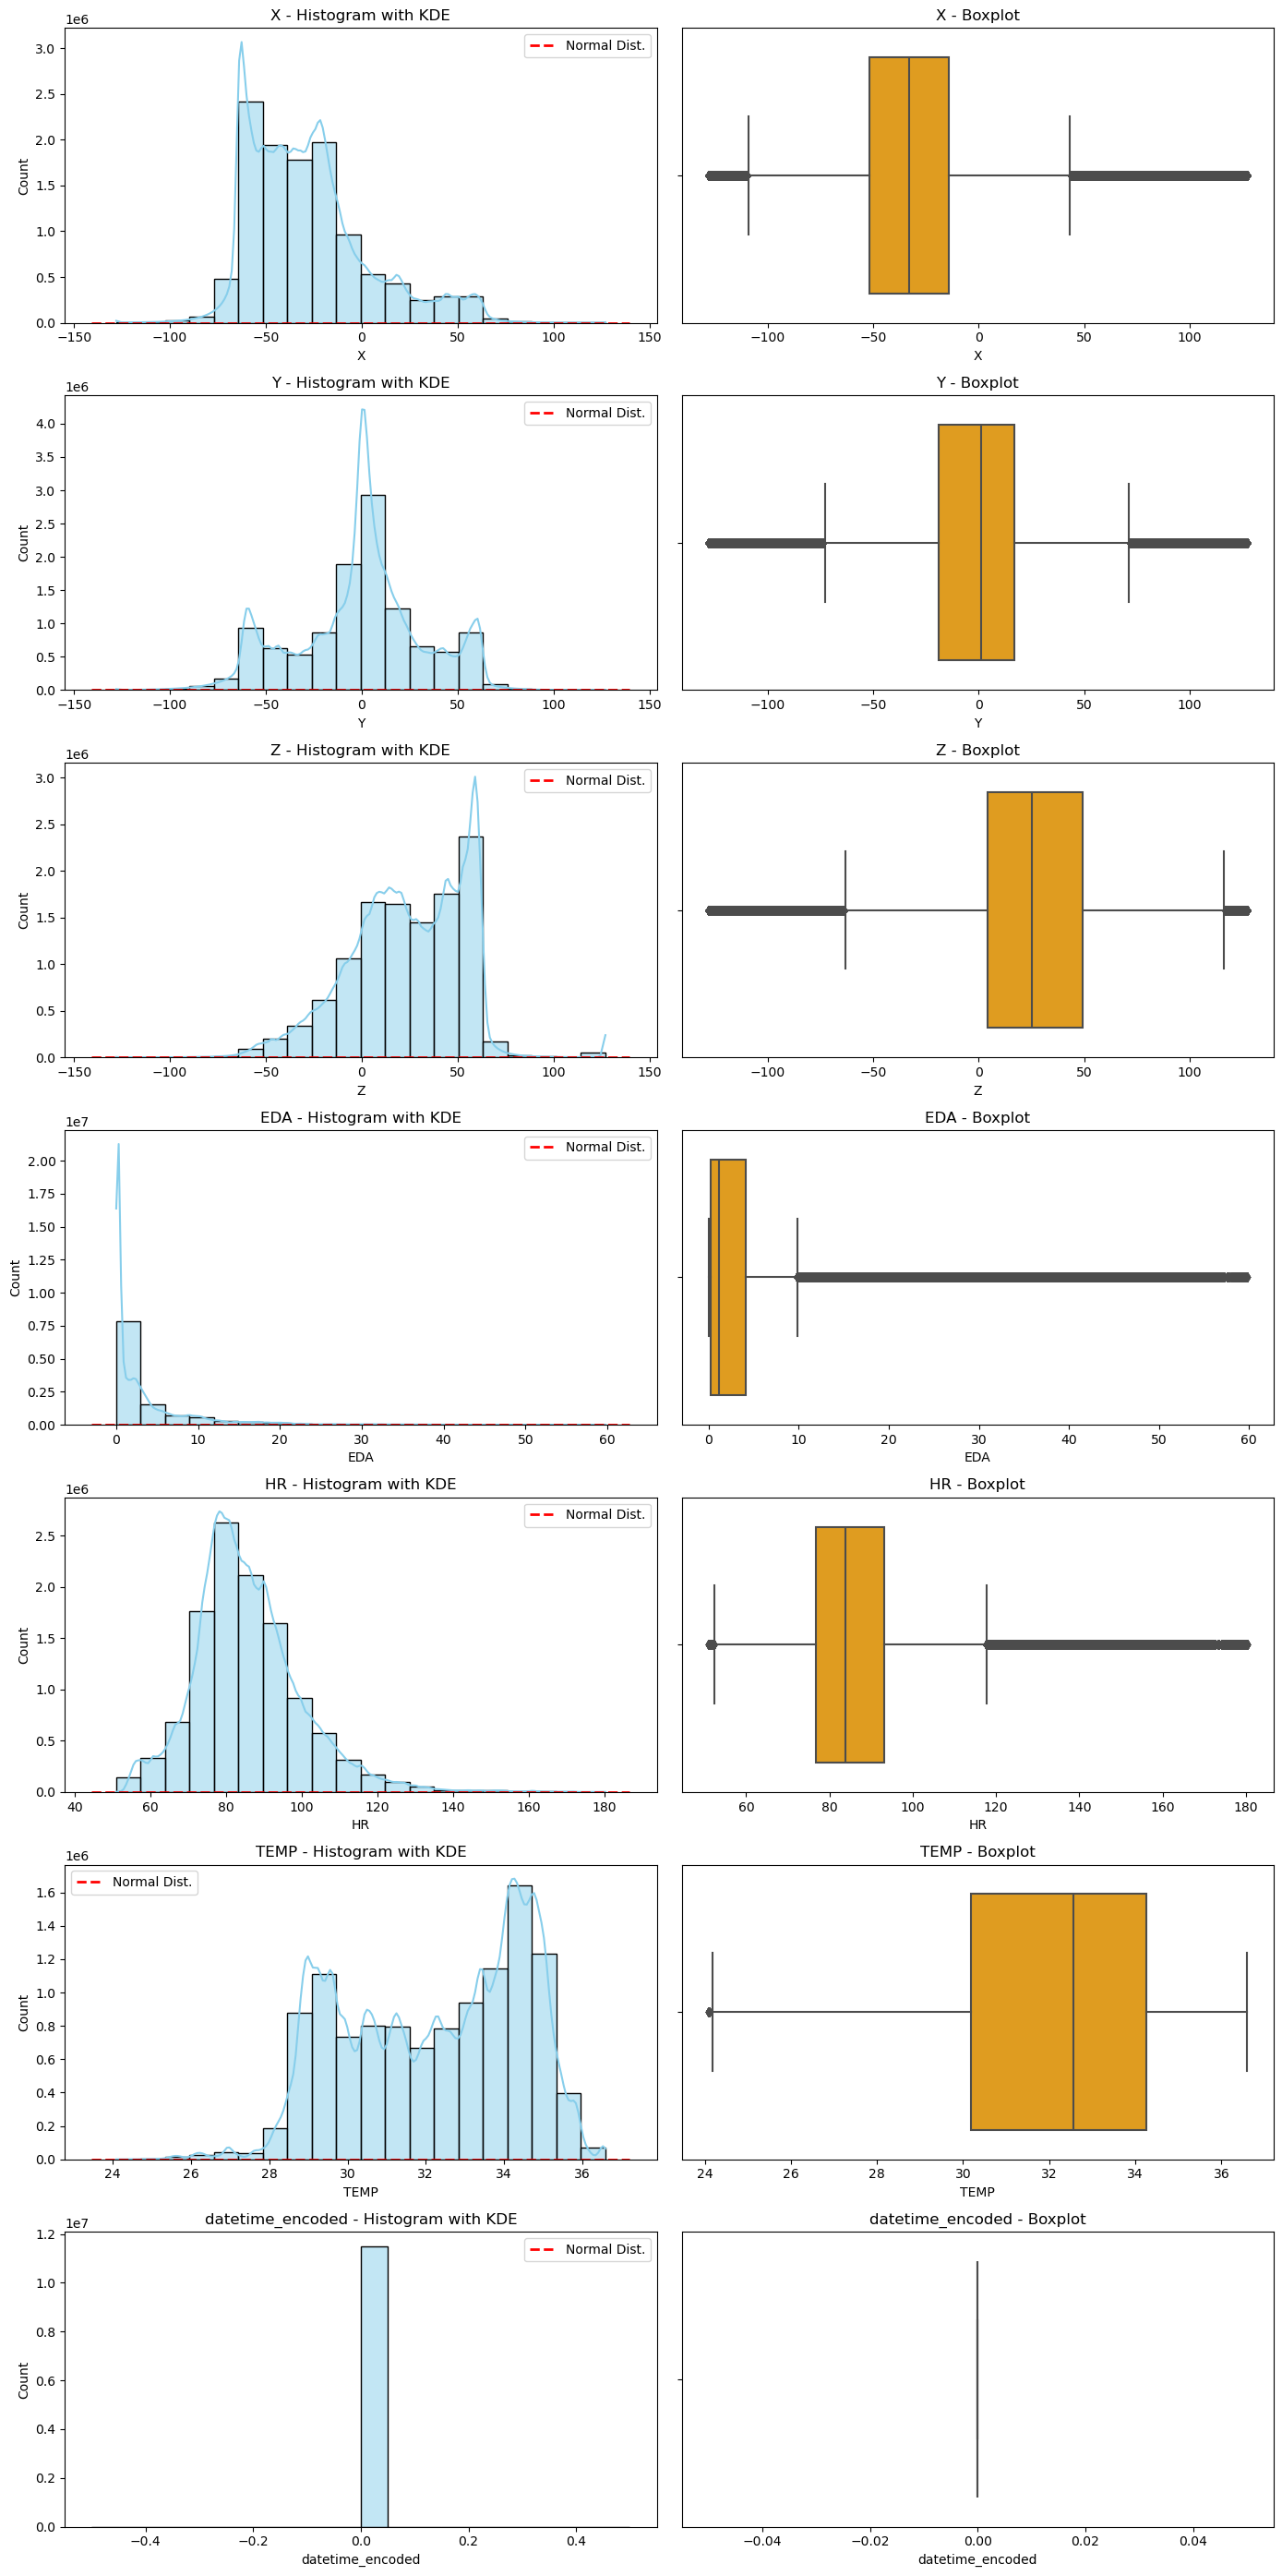

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# List of columns you want to visualize
columns = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'datetime_encoded']

# Create subplots - 2 rows (Histogram and Boxplot) for each feature
fig, axes = plt.subplots(len(columns), 2, figsize=(14, len(columns) * 4))

# Loop through each column
for i, col in enumerate(columns):
    # Plot histogram with KDE for skewness
    sns.histplot(data[col], kde=True, color='skyblue', ax=axes[i, 0], bins=20)
    axes[i, 0].set_title(f'{col} - Histogram with KDE', fontsize=12)
    axes[i, 0].set_xlabel(f'{col}')

    # Overlay a normal distribution
    mean, std = data[col].mean(), data[col].std()
    xmin, xmax = axes[i, 0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, std)
    axes[i, 0].plot(x, p, 'r--', label='Normal Dist.', lw=2)
    axes[i, 0].legend()

    # Plot boxplot for visualizing kurtosis
    sns.boxplot(x=data[col], ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f'{col} - Boxplot', fontsize=12)
    axes[i, 1].set_xlabel(f'{col}')

# Adjust layout
plt.tight_layout()
plt.show()

In [33]:
data.head()

,X,Y,Z,EDA,HR,TEMP,datetime,label,year,month,day,hour,datetime_encoded
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,NaT,2.0,NaN,NaN,NaN,NaN,0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,NaT,2.0,NaN,NaN,NaN,NaN,0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,NaT,2.0,NaN,NaN,NaN,NaN,0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,NaT,2.0,NaN,NaN,NaN,NaN,0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,NaT,2.0,NaN,NaN,NaN,NaN,0


In [34]:
#calculating the skewness and kurtosis before and after applying a transformation to the 'EDA' column.
#using cube root transformation (train['EDA'] = train['EDA']**(1/3)) to reduce skewness
import scipy.stats as stats

# Original EDA skewness and kurtosis
print("EDA Original value")
print("Skewness: %f" % data['EDA'].skew())
print("Kurtosis: %f" % data['EDA'].kurt())

# Apply cube root transformation to EDA to reduce skewness
print("\nEDA Adjusted value (Cube Root Transformation)")
data['EDA'] = data['EDA']**(1/3)
print('Skewness: %f' % stats.skew(data['EDA'], bias=False))
print('Kurtosis: %f' % stats.kurtosis(data['EDA'], bias=False, fisher=True))

#Positive skewness: Indicates a right-skewed distribution (long tail on the right).
#Negative skewness: Indicates a left-skewed distribution (long tail on the left).
#Kurtosis: Values near 0 (when fisher=True) indicate a normal-like distribution;
#positive values mean a more peaked distribution, while negative values indicate a flatter distribution.

EDA Original value
Skewness: 3.026141
Kurtosis: 12.169553

EDA Adjusted value (Cube Root Transformation)
Skewness: 0.814998
Kurtosis: -0.014349


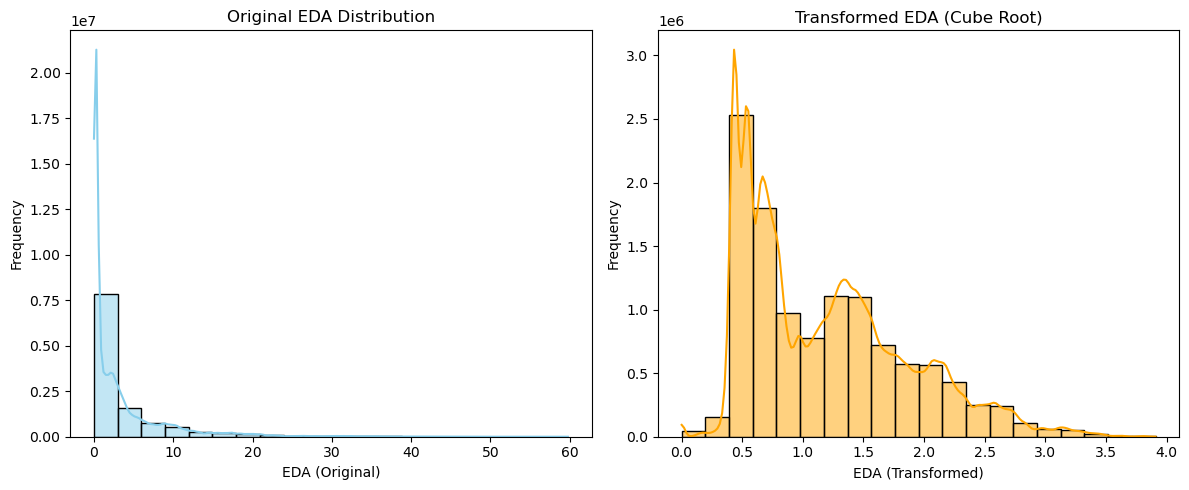

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the original and transformed EDA distribution side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original EDA distribution
sns.histplot(data['EDA']**3, kde=True, color='skyblue', ax=axes[0], bins=20)
axes[0].set_title('Original EDA Distribution')
axes[0].set_xlabel('EDA (Original)')
axes[0].set_ylabel('Frequency')

# Transformed EDA distribution (Cube Root)
sns.histplot(data['EDA'], kde=True, color='orange', ax=axes[1], bins=20)
axes[1].set_title('Transformed EDA (Cube Root)')
axes[1].set_xlabel('EDA (Transformed)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#Left Plot: The first subplot shows the distribution of the original EDA values.
#Right Plot: The second subplot shows the distribution after applying the cube root transformation.
#KDE Overlay: Kernel Density Estimation (KDE) is added to smooth the histogram and help visualize the overall shape of the distribution.

# Feature Selection



Missing values in X_data_feature: 57545255
Missing values in y_data_feature: 0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.180219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 11509051, number of used features: 14
[LightGBM] [Info] Start training from score -1.671986
[LightGBM] [Info] Start training from score -2.658530
[LightGBM] [Info] Start training from score -0.298304


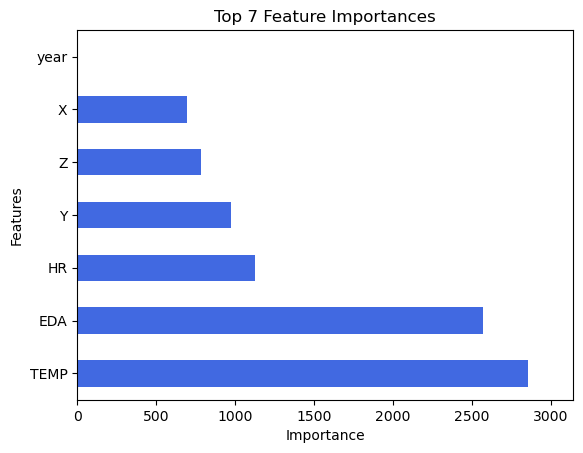

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from lightgbm import LGBMClassifier

# Preparing the data
X_data_feature = data.drop(columns=['label', 'datetime_encoded'], axis=1)  # Dropping the 'label' and 'datetime_encoded' columns
y_data_feature = data['label']

# Check for missing values in X_data_feature and y_data_feature
print("Missing values in X_data_feature:", X_data_feature.isnull().sum().sum())
print("Missing values in y_data_feature:", y_data_feature.isnull().sum())

# Handle missing values in X_data_feature (example: fill with mean)
X_data_feature.fillna(X_data_feature.mean(), inplace=True)

# Handle missing values in y_data_feature (example: drop rows with missing values)
# You can choose other methods like imputation if appropriate
y_data_feature.dropna(inplace=True)

# Align X_data_feature with y_data_feature after dropping rows
X_data_feature = X_data_feature.loc[y_data_feature.index]  # Use .loc to select rows based on index

# Check for datetime columns
datetime_cols = X_data_feature.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical features (e.g., ordinal or extract year, month, etc.)
for col in datetime_cols:
    X_data_feature[col + '_year'] = X_data_feature[col].dt.year
    X_data_feature[col + '_month'] = X_data_feature[col].dt.month
    X_data_feature[col + '_day'] = X_data_feature[col].dt.day
    X_data_feature[col + '_hour'] = X_data_feature[col].dt.hour
    # Drop the original datetime column
    X_data_feature.drop(columns=[col], inplace=True)

# Train the model using LightGBM
model = LGBMClassifier()
model.fit(X_data_feature, y_data_feature)

# Feature Importances
feat_importances = pd.Series(model.feature_importances_, index=X_data_feature.columns)

# Plot top 7 feature importances
feat_importances.nlargest(7).plot(kind='barh', color='royalblue')
plt.title('Top 7 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.xlim(0, feat_importances.max() * 1.1)
plt.show()

###Missing Values Handling:

# Numerical features are filled with the mean
# (X_data_feature.fillna(X_data_feature.mean(), inplace=True)).
# Missing values in the target (y_data_feature) are dropped. Alternatively, you can impute them based on the problem.
# After dropping rows with missing target values, we realign the X_data_feature dataframe to match the indices of y_data_feature.

###Datetime Feature Engineering:

#For any datetime columns, we extract the year, month, day, and hour as numerical features.
#After extracting the necessary components, the original datetime columns are dropped.

###Model Training:

#LightGBM is trained on the processed features.
#Feature importance is computed and visualized for the top 7 most important features using a bar chart.

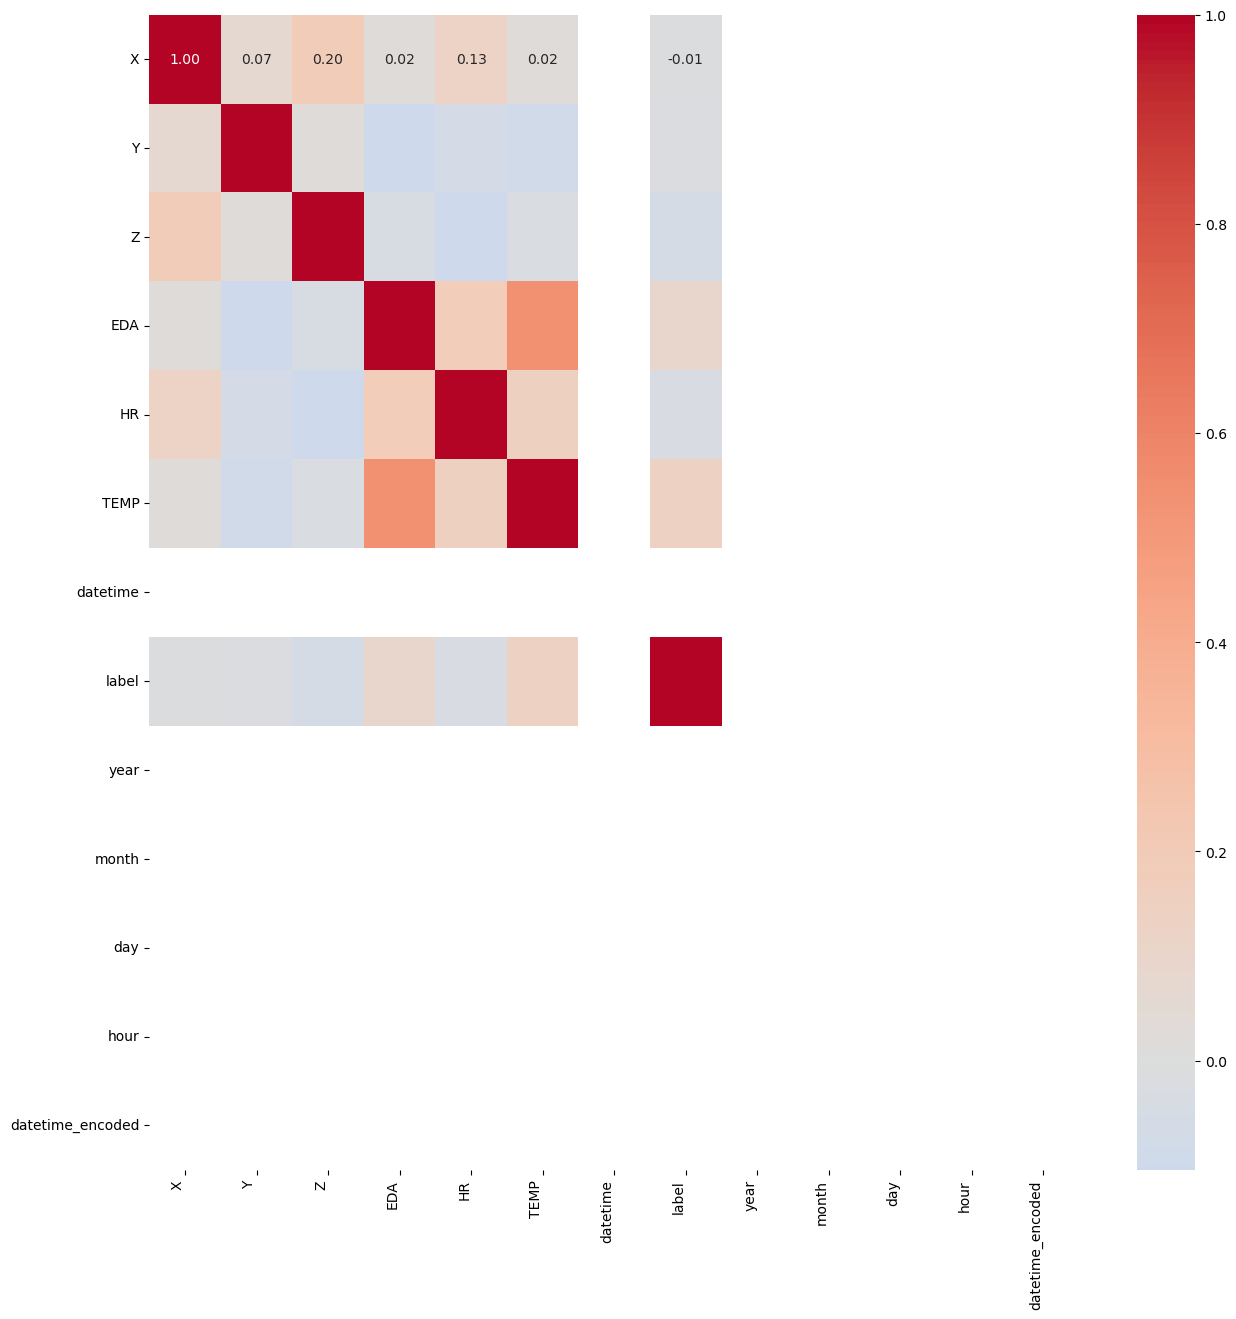

In [43]:
#heatmap showing the Pearson correlation coefficients
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = data.corr(method='pearson')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", center=0, ax=ax)

# Rotate the x-tick labels for better visibility
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)

# Show plot
plt.show()

In [44]:
X = data.drop(columns=['label', 'datetime', 'year', 'month', 'day', 'hour', 'datetime_encoded'], axis=1)
y = data['label']

In [45]:
data.head()

,X,Y,Z,EDA,HR,TEMP,datetime,label,year,month,day,hour,datetime_encoded
0,-13.0,-61.0,5.0,1.891746,99.43,31.17,NaT,2.0,NaN,NaN,NaN,NaN,0
1,-20.0,-69.0,-3.0,1.891746,99.43,31.17,NaT,2.0,NaN,NaN,NaN,NaN,0
2,-31.0,-78.0,-15.0,1.891746,99.43,31.17,NaT,2.0,NaN,NaN,NaN,NaN,0
3,-47.0,-65.0,-38.0,1.891746,99.43,31.17,NaT,2.0,NaN,NaN,NaN,NaN,0
4,-67.0,-57.0,-53.0,1.891746,99.43,31.17,NaT,2.0,NaN,NaN,NaN,NaN,0


In [46]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assigning X and y
X_train = X
y_train = y

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data (X)
X_train_scaled = scaler.fit_transform(X_train)

# Convert back to a DataFrame and preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Display the scaled DataFrame
X_train_scaled


,X,Y,Z,EDA,HR,TEMP
0,0.450980,0.262745,0.521569,0.483865,0.374758,0.5664
1,0.423529,0.231373,0.490196,0.483865,0.374758,0.5664
2,0.380392,0.196078,0.443137,0.483865,0.374758,0.5664
3,0.317647,0.247059,0.352941,0.483865,0.374758,0.5664
4,0.239216,0.278431,0.294118,0.483865,0.374758,0.5664
...,...,...,...,...,...,...
11509046,0.439216,0.282353,0.596078,0.384084,0.289174,0.7744
11509047,0.470588,0.305882,0.607843,0.384084,0.289174,0.7744
11509048,0.392157,0.360784,0.611765,0.384084,0.289174,0.7744
11509049,0.388235,0.388235,0.619608,0.384084,0.289174,0.7744


# Visualization of Scaled Data

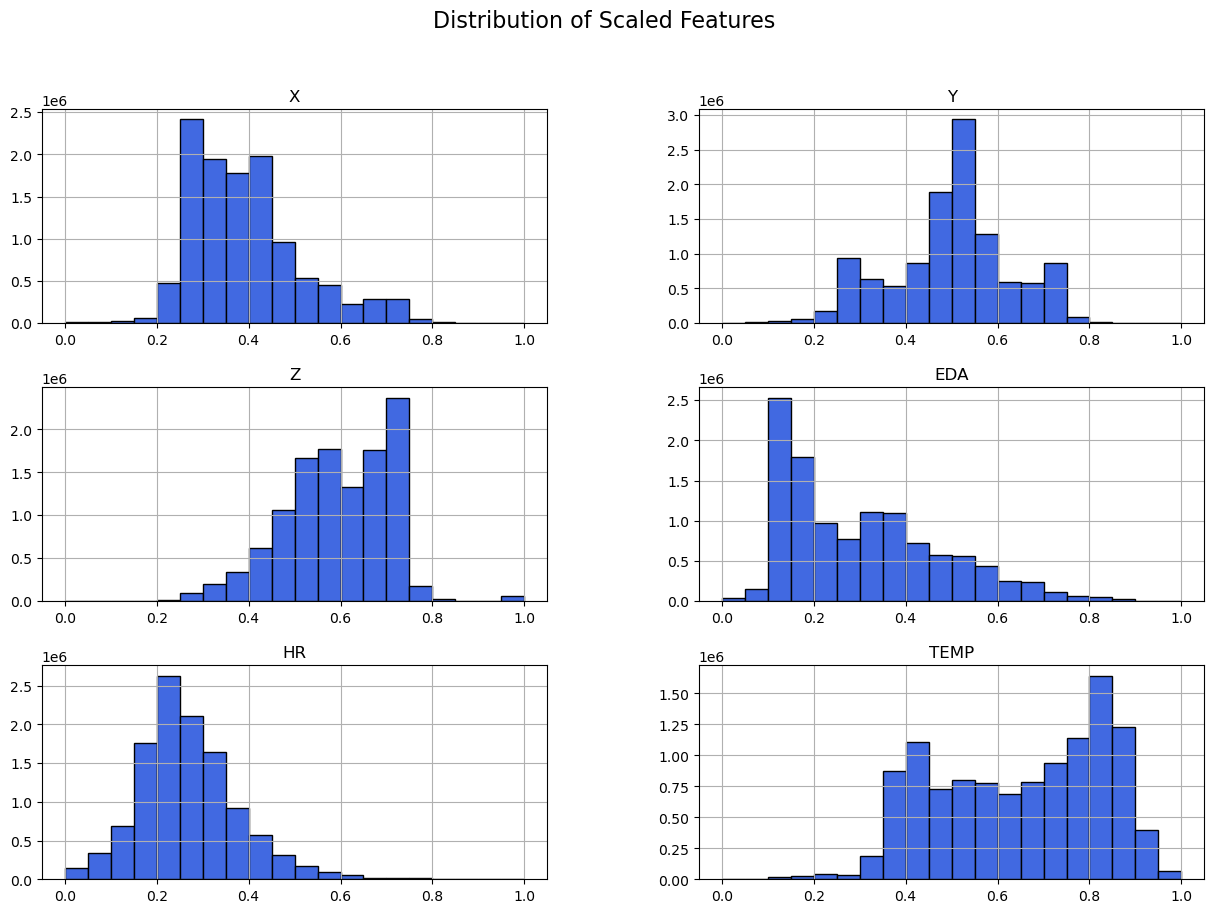

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each scaled feature
X_train_scaled.hist(bins=20, figsize=(15, 10), color='royalblue', edgecolor='black')
plt.suptitle('Distribution of Scaled Features', fontsize=16)
plt.show()

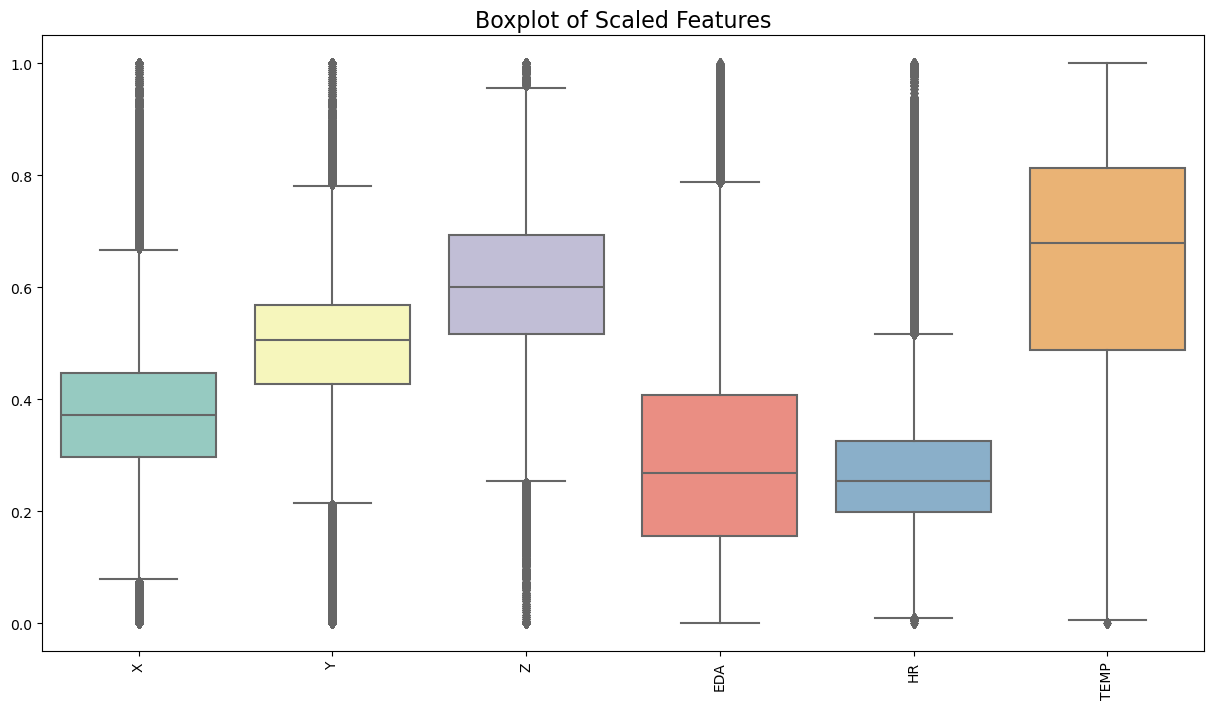

In [48]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_train_scaled, palette='Set3')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if feature names are long
plt.title('Boxplot of Scaled Features', fontsize=16)
plt.show()

# Train Test Split

In [49]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,test_size=0.2,random_state=2019)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (9207240, 6)
Shape of X_eval:  (2301811, 6)
Shape of y_train:  (9207240,)
Shape of y_eval (2301811,)


## Principal Component Analysis

In [63]:
#import PCA libraries
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler #Fixed typo here

#fitting PCA
pca = PCA(n_components=5).fit(X_train)

#Explained Variance Code
exp = pca.explained_variance_ratio_
print(exp)

[0.37244437 0.33054102 0.2357431  0.05968653 0.00158498]


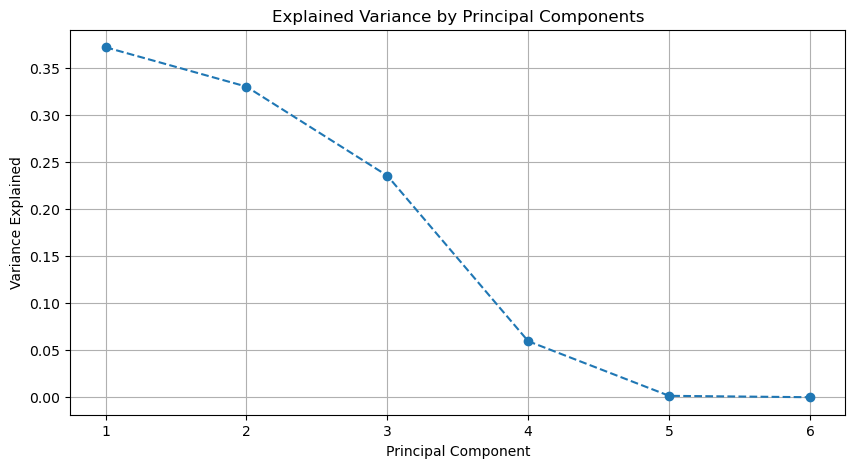

In [53]:
#visualize the explained variance by principal components
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(exp) + 1), exp, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(exp) + 1))
plt.grid()
plt.show()
#X-axis (Principal Component): Shows each principal component in order of how much variance they capture.
#Y-axis (Variance Explained): Represents the proportion of variance that each principal component explains in the dataset.
#Line and markers: Indicate the variance explained by each successive component.

In [65]:
#(IncrementalPCA) to reduce the dimensionality of both X_train and X_eval datasets
#IncrementalPCA(n_components=5): This specifies that you want to reduce the number of features down to 5 principal components using Incremental PCA, 
#which is useful for large datasets as it processes data in mini-batches rather than loading the entire dataset into memory at once.
#fit_transform(X_train): Fits the PCA model to X_train and transforms the data into the new feature space with 5 components.

#Applying IncrementalPCA to X_train:
X_train_pca = IncrementalPCA(n_components=5).fit_transform(X_train)

#Applying IncrementalPCA to X_eval:
X_eval_pca = IncrementalPCA(n_components=5).fit_transform(X_eval)

#Updating X_train and X_eval with PCA-transformed Data:
X_train = X_train_pca
X_eval = X_eval_pca

#Display the transformed data:
display(X_train)
display(X_eval)

#Both X_train and X_eval will now be matrices with 5 columns, each representing one of the principal components. 
#If X_train originally had m samples, the resulting X_train will have shape (m, 5). 
#Similarly, X_eval will have the shape (n, 5) where n is the number of evaluation samples.
#IncrementalPCA is particularly useful when:
#1.The dataset is too large to fit into memory all at once.
#2.You want to perform PCA in mini-batches while maintaining performance similar to standard PCA.

array([[ 74.11172141,  51.01244027, -11.97009079,   3.31190075,
          2.37895977],
       [ 38.36277407, -22.20244257,  16.83782132,  -1.52001908,
          1.8652732 ],
       [ 46.06440967, -41.98163178,  -1.20958742, -16.35895826,
          3.38733883],
       ...,
       [ 50.73044307, -46.36858177, -30.76610836, -15.62010178,
         -1.40120729],
       [-48.20374688, -26.55708336, -71.34925117,  -5.8604229 ,
          1.63544565],
       [-26.63762059,  24.47577423,   6.76339815,  -8.45327456,
          2.65552652]])

array([[ 11.07662208, -10.24890693,  29.53994878, -25.19730978,
         -2.51830169],
       [-56.52549298,  62.45663874, -21.00646524,  20.77248731,
          1.2001067 ],
       [-36.27785194, -44.63794381, -19.37922119,  10.35606867,
          0.87206748],
       ...,
       [ 36.05940751,   1.01764112,  26.3185327 ,   1.35344325,
         -3.36009357],
       [-41.82056331,  -6.4061086 ,  12.06008365,   2.82981016,
          2.05297124],
       [ 64.7683306 ,  16.11967962, -13.78531473,   4.35234258,
         -0.25739115]])

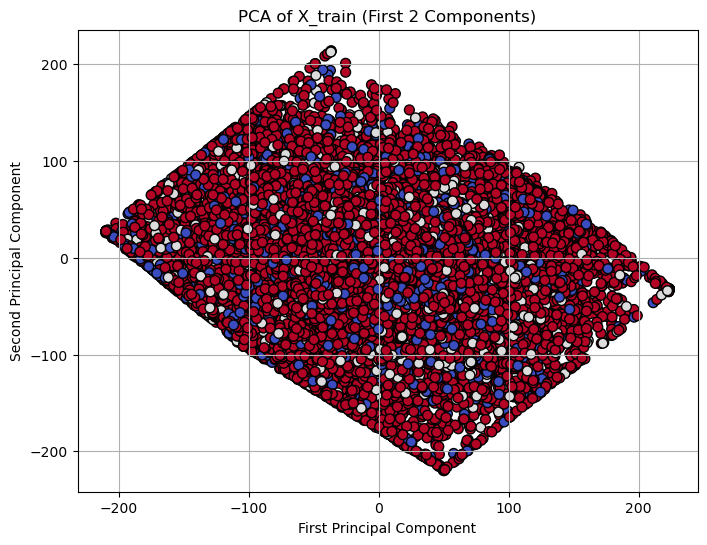

In [64]:
#Visualizing the PCA-Reduced Data:
# Assuming you reduced the data to 2 components
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=50)
plt.title('PCA of X_train (First 2 Components)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()

#IncrementalPCA is particularly useful when:
#1.The dataset is too large to fit into memory all at once.
#2.You want to perform PCA in mini-batches while maintaining performance similar to standard PCA.

## Training Models

In [ ]:
LGBM = LGBMClassifier(objective='multiclass')
LGBM.fit(X_train, y_train)
XGB = XGBClassifier(objective='multi:softmax')
XGB.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest Classifier
RF = RandomForestClassifier(n_estimators=100, random_state=42,)
RF.fit(X_train, y_train)
from sklearn.svm import SVC

# Initialize and train Support Vector Machine Classifier
SVM = SVC(kernel='linear', decision_function_shape='ovo')  # One-vs-one strategy for multiclass classification
SVM.fit(X_train, y_train)
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression for multiclass
LogReg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
LogReg.fit(X_train, y_train)

In [ ]:
# Predict and evaluate using LightGBM
y_pred_LGBM = LGBM.predict(X_eval)
print(f"LightGBM Accuracy: {accuracy_score(y_eval, y_pred_LGBM)}")

# Predict and evaluate using XGBoost
y_pred_XGB = XGB.predict(X_eval)
print(f"XGBoost Accuracy: {accuracy_score(y_eval, y_pred_XGB)}")

# Predict and evaluate using RandomForrest
y_pred_RF = RF.predict(X_eval)
print(f"Random Forest Accuracy: {accuracy_score(y_eval, y_pred_RF)}")

# Predict and evaluate using Support Vector Machines
y_pred_SVM = SVM.predict(X_eval)
print(f"SVM Accuracy: {accuracy_score(y_eval, y_pred_SVM)}")

# Predict and valuate using Logistic Regression
y_pred_LogReg = LogReg.predict(X_eval)
print(f"Logistic Regression Accuracy: {accuracy_score(y_eval, y_pred_LogReg)}")